In [1]:
import pandas as pd
import random

# Sample review phrases
positive_phrases = [
    "Absolutely loved it!", "Fantastic product", "Excellent service", "Very satisfied", "Highly recommend"
]
neutral_phrases = [
    "It was okay", "Nothing special", "Average experience", "Neutral opinion", "Decent but not great"
]
negative_phrases = [
    "Terrible experience", "Not worth the money", "Very disappointed", "Poor quality", "Won't buy again"
]

# Generate 500 random reviews
reviews = []
for _ in range(500):
    label = random.choices(["positive", "neutral", "negative"], weights=[0.4, 0.3, 0.3])[0]
    if label == "positive":
        text = random.choice(positive_phrases)
    elif label == "neutral":
        text = random.choice(neutral_phrases)
    else:
        text = random.choice(negative_phrases)
    reviews.append((text, label))

# Create DataFrame
df = pd.DataFrame(reviews, columns=["review", "sentiment"])
df.to_csv("customer_reviews.csv", index=False)
df.head()


,review,sentiment
0,Excellent service,positive
1,Excellent service,positive
2,Very satisfied,positive
3,Very disappointed,negative
4,Fantastic product,positive


In [3]:
!pip install textblob

   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
    --------------------------------------- 10.2/624.3 kB ? eta -:--:--
   - ------------------------------------- 20.5/624.3 kB 217.9 kB/s eta 0:00:03
   - ------------------------------------- 30.7/624.3 kB 217.9 kB/s eta 0:00:03
   --- ----------------------------------- 61.4/624.3 kB 326.1 kB/s eta 0:00:02
   --------- ---------------------------- 163.8/624.3 kB 701.4 kB/s eta 0:00:01
   ---------------------------------------- 624.3/624.3 kB 2.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------------------- -------------------- 0.7/1.5 MB 23.1 MB/s eta 0:00:01
   ---------------------------------------  1.5/1.5 MB 19.2 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 16.1 MB/s eta 0:00:00
  Attempting uninstall: nltk
    Found existing installation: nltk 3.8.1
    Uninstalling nltk-3.8.1:
      Successfully uninstalled nltk-3.8.1


In [4]:
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("customer_reviews.csv")

# Analyze sentiment polarity
def get_sentiment_label(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0.1:
        return "positive"
    elif polarity < -0.1:
        return "negative"
    else:
        return "neutral"

df["predicted_sentiment"] = df["review"].apply(get_sentiment_label)
df.head()


,review,sentiment,predicted_sentiment
0,Excellent service,positive,positive
1,Excellent service,positive,positive
2,Very satisfied,positive,positive
3,Very disappointed,negative,negative
4,Fantastic product,positive,positive


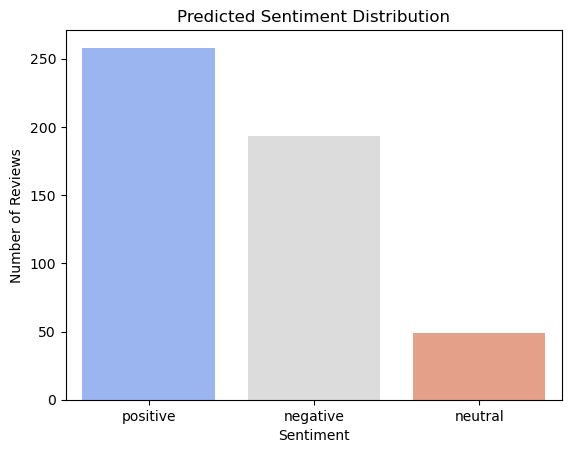

In [5]:
# Compare actual vs predicted
sns.countplot(x="predicted_sentiment", data=df, palette="coolwarm")
plt.title("Predicted Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()


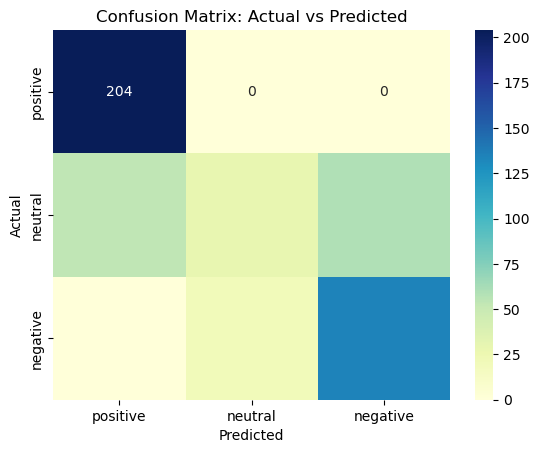

              precision    recall  f1-score   support

    negative       0.69      0.87      0.77       154
     neutral       0.59      0.20      0.30       142
    positive       0.79      1.00      0.88       204

    accuracy                           0.73       500
   macro avg       0.69      0.69      0.65       500
weighted avg       0.70      0.73      0.68       500



In [6]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

cm = confusion_matrix(df["sentiment"], df["predicted_sentiment"], labels=["positive", "neutral", "negative"])
sns.heatmap(cm, annot=True, fmt='d', xticklabels=["positive", "neutral", "negative"],
            yticklabels=["positive", "neutral", "negative"], cmap="YlGnBu")
plt.title("Confusion Matrix: Actual vs Predicted")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(classification_report(df["sentiment"], df["predicted_sentiment"]))
